In [1]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [ ]:
##  DeepFace je open-source knihovna pro rozpoznávání obličejů pomocí hlubokého učení. Umožňuje snadné použití předtrénovaných modelů pro analýzu tváří, včetně.
## Odhad pohlaví a věku, Rozpoznání obličeje (identifikace osoby), Analýza emocí (šťastný, smutný, naštvaný atd.)

In [2]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace
import os

In [47]:
obrazek = cv2.imread('muz_bryle.jpg') # načítam obrazek
## obrazek = obrazek.resize(512, 420)
## obrazek = cv2.imread('bryle.jpg') # načítam obrazek
obrazek = cv2.cvtColor(obrazek, cv2.COLOR_BGR2RGB)  # konverze barev z BlueGreenRed na RedGreenB
## obrazek

## Zobrazení obrázku na plotu

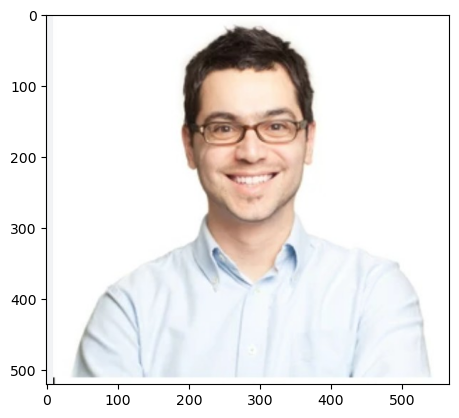

In [48]:
plt.imshow(obrazek)
## plt.show()

## Analýza obrázku

In [49]:
prediction = DeepFace.analyze(obrazek)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]  


## Výsledky analýzy

In [50]:
prediction

[{'emotion': {'angry': 3.492590883169555e-07,
   'disgust': 9.826563431151525e-17,
   'fear': 3.08311297499142e-10,
   'happy': 99.99998807907104,
   'sad': 1.1891785334228189e-07,
   'surprise': 2.1932225133247663e-09,
   'neutral': 1.3965573941732146e-05},
  'dominant_emotion': 'happy',
  'region': {'x': 186,
   'y': 84,
   'w': 199,
   'h': 199,
   'left_eye': (323, 157),
   'right_eye': (251, 160)},
  'face_confidence': 0.91,
  'age': 26,
  'gender': {'Woman': 0.000176431797171972, 'Man': 99.99982118606567},
  'dominant_gender': 'Man',
  'race': {'asian': 3.7082173776070704e-05,
   'indian': 0.0002874837264243979,
   'black': 4.814955190113324e-06,
   'white': 98.90750050544739,
   'middle eastern': 0.7068566046655178,
   'latino hispanic': 0.3853120608255267},
  'dominant_race': 'white'}]

##  Určení emocí z obrázku

In [51]:
predictions = [{prediction[0]['dominant_emotion'],prediction[0]['dominant_gender'],prediction[0]['dominant_race']}]

In [52]:
predictions

[{'Man', 'happy', 'white'}]

In [53]:
oblicej = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
usmev = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
bryle = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cernobily = cv2.cvtColor(obrazek, cv2.COLOR_BGR2GRAY)

## Vyhledavaní obličeje na obrázku a označení čtvercem

# Zobrazení obrázku v černobílém formátu

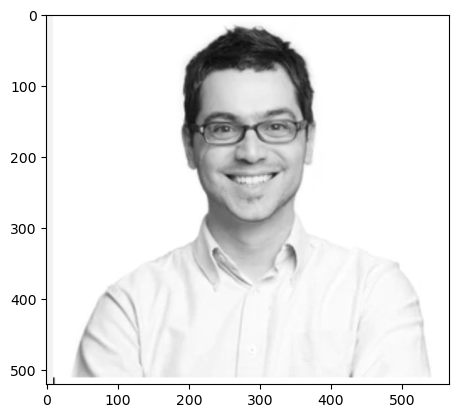

In [54]:
plt.imshow(cernobily, cmap='gray')

## Vyhledavame obličej a oramujeme

In [55]:
face = oblicej.detectMultiScale(cernobily, 1.1, 4)

# scaleFactor=1.3: Určuje, jak moc se velikost obrázku zmenšuje při každém kroku. Nižší hodnota znamená přesnější, ale pomalejší detekci.
# minNeighbors=6: Kolik překrytí musí mít detekce, aby byl výsledek považován za platný. Vyšší číslo = méně falešných poplachů, ale může vynechat slabě detekované obličeje.

# Kreslime rameček kolem tváře
for (x, y, w, h) in face:
    cv2.rectangle(obrazek, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
# # Kreslime rameček kolem usměvu
oblast_obliceje = cernobily[y:y+h, x:x+w]
## usmevy = usmev.detectMultiScale(oblast_obliceje, scaleFactor=1.2, minNeighbors=6)
smile = usmev.detectMultiScale(oblast_obliceje, 1.8, 8)

for (sx, sy, sw, sh) in smile:
    cv2.rectangle(obrazek, (x+sx, y+sy), (x+sx+sw, y+sy+sh), (0, 255, 0), 2)

# ## Kreslime rameček kolem brylí
glasses = bryle.detectMultiScale(oblast_obliceje, 1.1, 4)
for (sgx, sgy, sgw, sgh) in glasses:
   cv2.rectangle(obrazek, (x+sgx, y+sgy), (x+sgx+sgw, y+sgy+sgh), (0, 0, 255), 2)



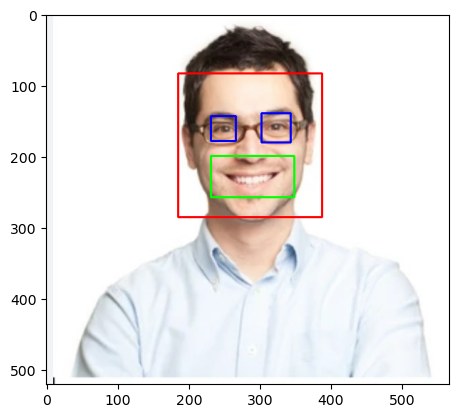

In [56]:
plt.imshow(obrazek)

## Nadpis emoce

In [57]:
obrazek.shape[2]

3

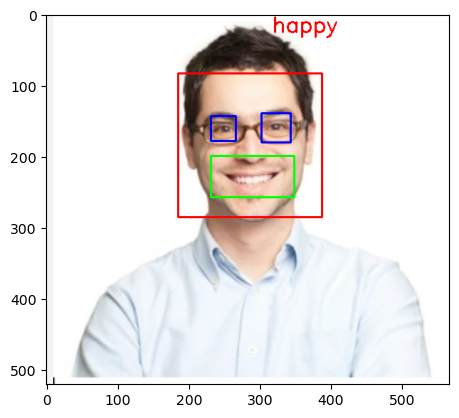

In [58]:
font = cv2.FONT_ITALIC
cv2.putText(obrazek, prediction[0]['dominant_emotion'], (obrazek.shape[1] - 250, 25), font, 1, (255, 0, 0), 2, cv2.LINE_4)
plt.imshow(obrazek)